# Project: Investigate a Medical Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#qs">Questions</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline
import seaborn as sns

<a id='intro'></a>
## Introduction

Why do 20%+ of patients miss their scheduled appointments? This project analyzes data collected from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Using NumPy and Pandas, this project looks at relationships between multiple variables: at least one dependent variable (No-show) and three independent variables (age, diabetes, week_day). variables are investigated using both single-variable (1d) and multiple-variable (2d) explorations.

Data:
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighbourhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in the Brasilian scholarship program.
* ‘No-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Questions

* What is the overall no-show percentage?
* Which factors can help predict if a patient will miss their scheduled appointment?
* What is the relationship between absenteeism and age?
* What is the relationship between absenteeism and appointment day?

<a id='wrangling'></a>
## Data wrangling

### General properties

In [2]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
print("Rows:  ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:   110527
Columns:  14


In [5]:
#Review data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#See entry types and options for each column
for  feature  in  ["Diabetes", "Alcoholism", "Hipertension", "Handcap",
                "Scholarship", "SMS_received", "Neighbourhood", 'No-show']:
    print("{}: {}".format(feature, df[feature].unique()))

Diabetes: [0 1]
Alcoholism: [0 1]
Hipertension: [1 0]
Handcap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO' 'DO MOSCOSO'
 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA' 'ILHA DO FRADE'
 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO' 'BOA VISTA'
 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA' 'BARRO VERMELHO'
 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'

In [8]:
#Check to see if there is any missing data
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

### Check for duplicates and review uniques

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique().sum()

276606

# Data cleaning

In [11]:
# Checking 'Age' entries for outliers
print ("Age range:", sorted(df['Age'].unique()))

Age range: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


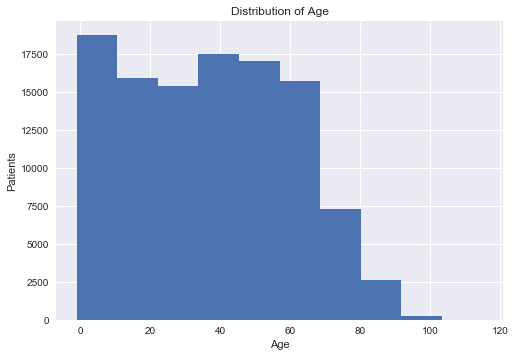

In [12]:
# Review 'Age' distribution 
plt.figure();
age_hist = df['Age'].plot.hist(bins=10)
age_hist.set_xlabel("Age")
age_hist.set_ylabel("Patients")
age_hist.set_title('Distribution of Age');

In [13]:
# remove age outliers
df = df[(df.Age >= 0) & (df.Age <= 95)]
df.shape

(110480, 14)

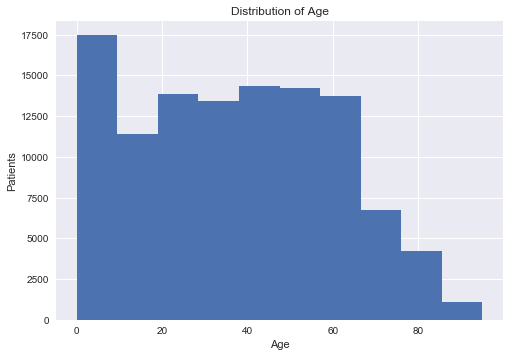

In [14]:
# Distribution of 'Age'
plt.figure();
age_hist = df['Age'].plot.hist(bins=10)
age_hist.set_xlabel("Age")
age_hist.set_ylabel("Patients")
age_hist.set_title('Distribution of Age');

In [15]:
min_age = df['Age'].min()
max_age = df['Age'].max()
print ("Age now spans: {} to {}.".format(min_age, max_age))

Age now spans: 0 to 95.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110480 non-null float64
AppointmentID     110480 non-null int64
Gender            110480 non-null object
ScheduledDay      110480 non-null object
AppointmentDay    110480 non-null object
Age               110480 non-null int64
Neighbourhood     110480 non-null object
Scholarship       110480 non-null int64
Hipertension      110480 non-null int64
Diabetes          110480 non-null int64
Alcoholism        110480 non-null int64
Handcap           110480 non-null int64
SMS_received      110480 non-null int64
No-show           110480 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [17]:
#Make all column headers lower case
df.columns = [x.lower() for x in df.columns]

In [18]:
#Drop 'scheduleday' as we will not need it to investigate 
#the specificed questions.
df = df.drop('scheduledday', 1)

In [19]:
#Replace dashes with underscores
df.columns = [x.strip().replace('-', '_') for x in df.columns]

In [20]:
# Renaming columns to fix typos, inconsistency and spelling mistakes
df.rename(columns={'appointmentid' :'appointment_id',
                   'handcap' :'handicap', 
                   'patientid' : 'patient_id',
                   'appointmentid' : 'appointment_id',
                   'appointmentday' : 'appointment_day',
                   'neighbourhood' : 'neighborhood',
                   'no_show' : 'absenteeism',
                   'hipertension':'hypertension'}, 
          inplace=True
         )

In [21]:
df.head()

,patient_id,appointment_id,gender,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absenteeism
0,2.987250e+13,5642903,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Manage absenteeism column

In [22]:
#Replace 'Yes' and 'No' with 1 and 0 for 'No-show'
  #0 = Showed up to appointment 
  #1 = did not show up to appointment (missed it)

In [23]:
#df['absenteeism'] = df['absenteeism'].map({'Yes':1,'No':0})

In [24]:
df['absenteeism'].replace({'No':0,'Yes':1},inplace=True)

In [25]:
# Create variables for missed and arrived
arrived = df.absenteeism == 0
missed = df.absenteeism == 1

### Add a mask

In [26]:
df_attendance = df [df['absenteeism']==0]

In [27]:
mask = df['absenteeism'] == 0
df_attendance = df[mask]
df_attendance

,patient_id,appointment_id,gender,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absenteeism
0,2.987250e+13,5642903,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,9.598513e+13,5626772,F,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,0
8,5.639473e+13,5638447,F,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,0
9,7.812456e+13,5629123,F,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,0
10,7.345362e+14,5630213,F,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,0
12,5.666548e+14,5634718,F,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,0


In [28]:
df_attendance.head()

,patient_id,appointment_id,gender,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absenteeism
0,2.987250e+13,5642903,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


### Manage gender entries

In [29]:
#Replace 'M' and 'F' with 1 and 0 for 'Gender' 
#df['gender'] = df['gender'].map({'M':1,'F':0})

In [30]:
df['gender'].replace({'M':0,'F':1},inplace=True)

### convert to datetime;  add: weekday, total_missed

In [31]:
df.appointment_day = df.appointment_day.apply(np.datetime64)

In [32]:
df['week_day'] = pd.to_datetime(df['appointment_day']).apply(lambda x: x.isoweekday())

### Adding age bins

In [33]:
#Creating the age_bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['age_bins'] = pd.cut(df['age'], bins)

<a id='eda'></a>
## Exploratory analysis


Descriptive summary

In [34]:
df.describe()

,patient_id,appointment_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absenteeism,week_day
count,1.104800e+05,1.104800e+05,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000
mean,1.474691e+14,5.675303e+06,0.649909,37.063342,0.098307,0.197076,0.071841,0.030413,0.022167,0.321126,0.201955,2.858137
std,2.560626e+14,7.128285e+04,0.477000,23.079712,0.297731,0.397792,0.258226,0.171721,0.161252,0.466911,0.401461,1.371623
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.172457e+12,5.640284e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,3.172598e+13,5.680564e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.438179e+13,5.725507e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000
max,9.999816e+14,5.790484e+06,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,6.000000


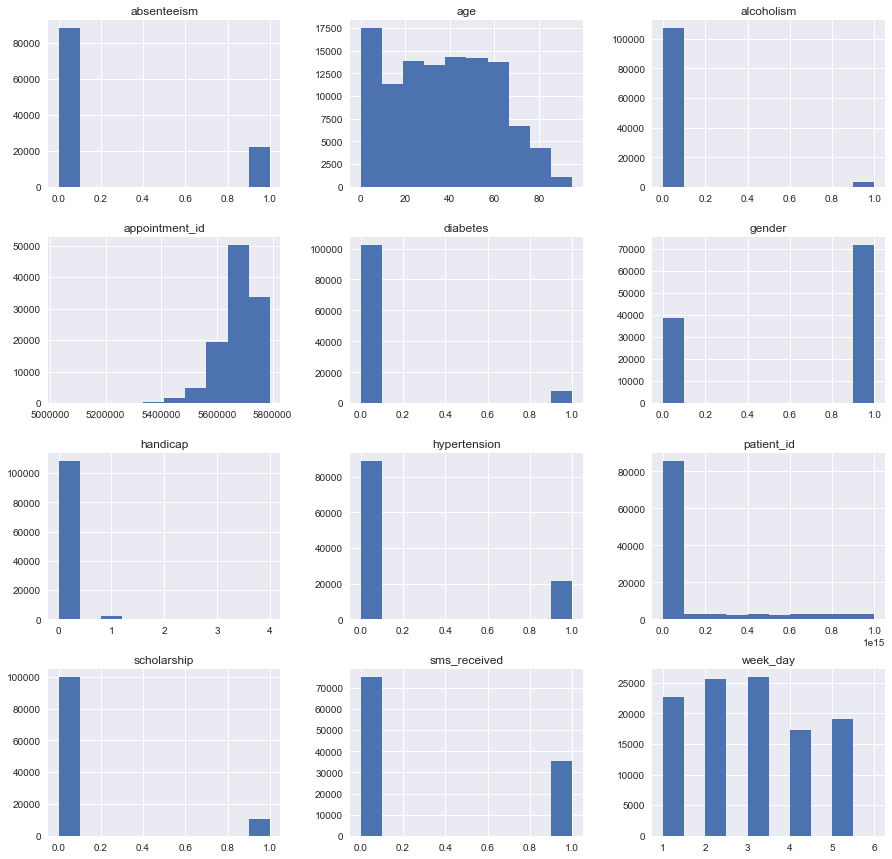

In [35]:
#Review and discover the underlying frequency distribution (shape) 
#of the data points in each column
df.hist(figsize=(15,15));

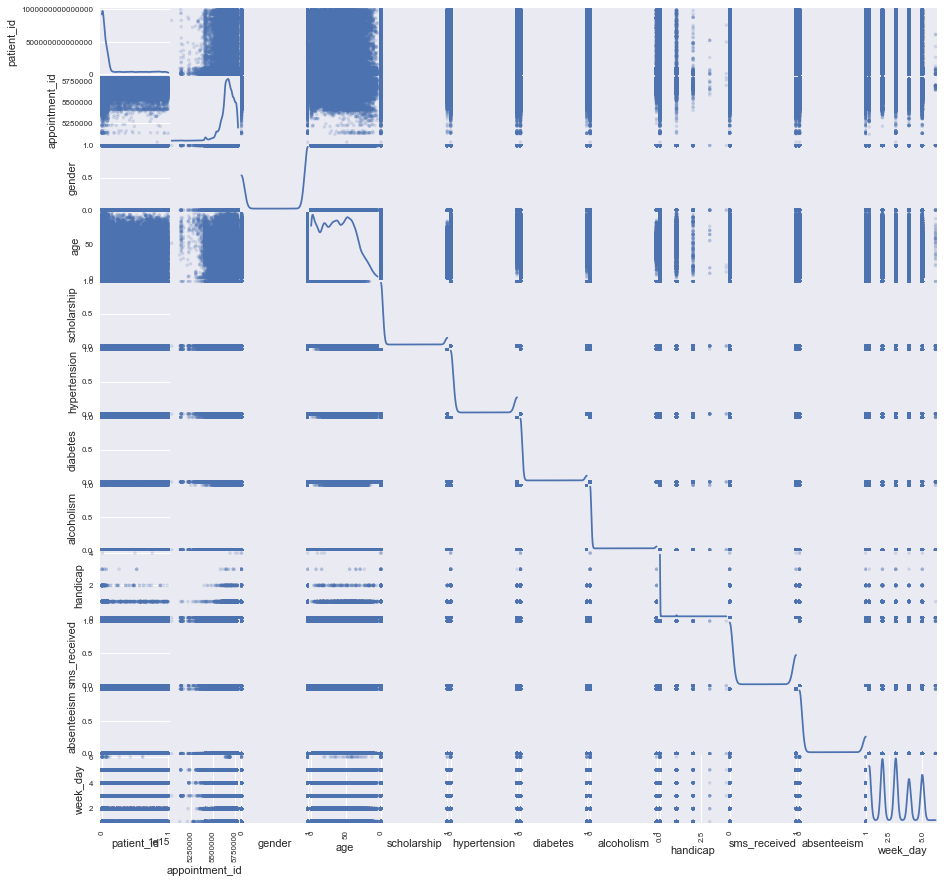

In [36]:
# Review the relationships between the attributes
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde');

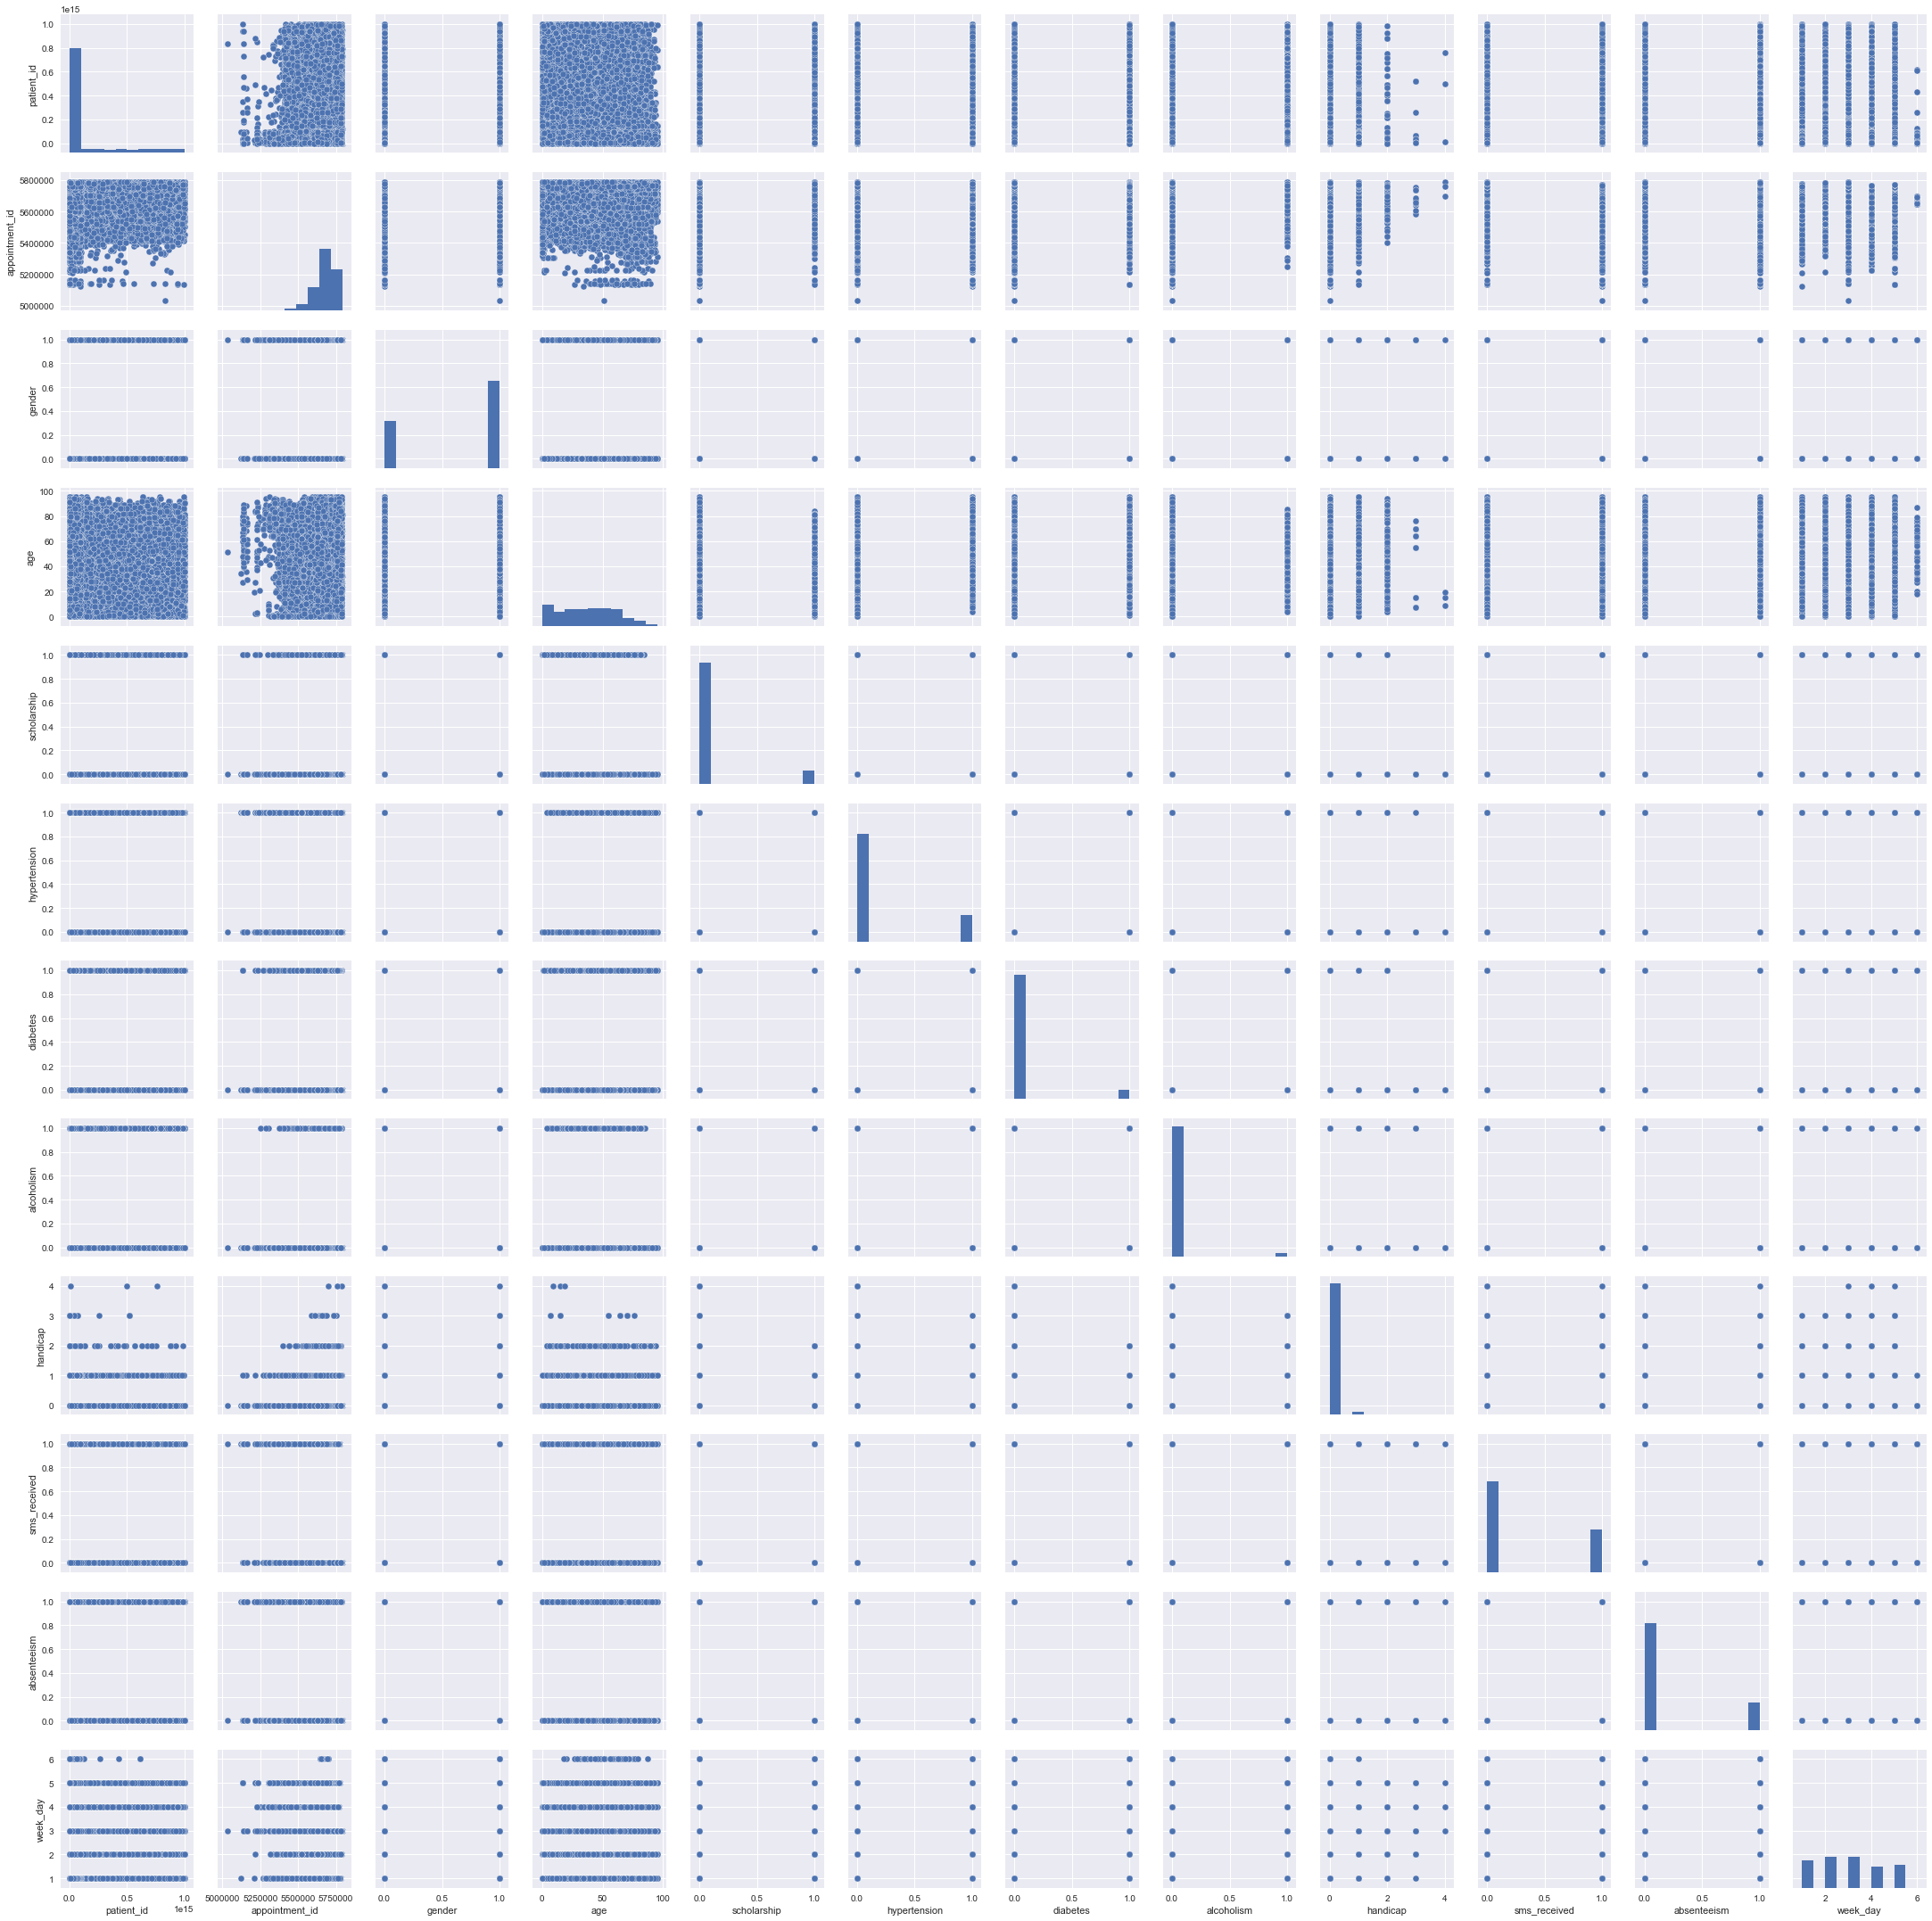

In [37]:
#Review the interactions between the variables
sns.pairplot(df);

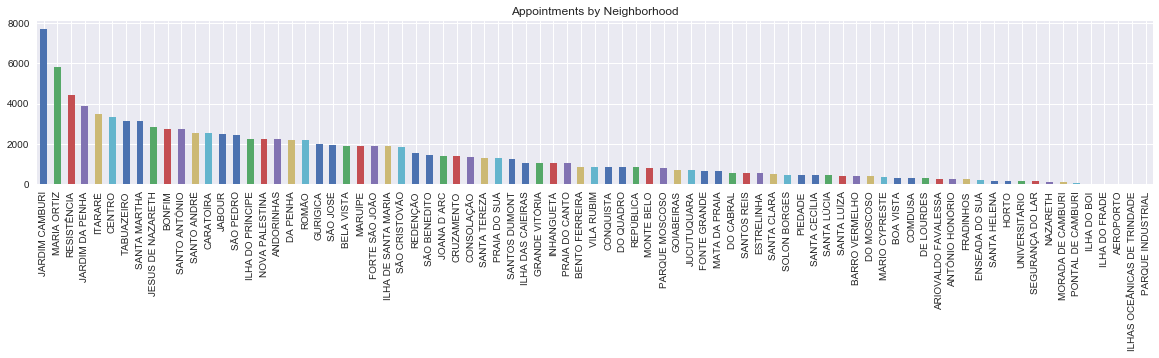

In [38]:
#Discover which neighborhoods are most represented in the data set 
df['neighborhood'].value_counts().plot(kind='bar', figsize=(20,3))
plt.title('Appointments by Neighborhood')
plt.show();

In [39]:
#create a list of top 30 neighborhoods to get a better view of those 
#neighborhoods with highest number of appointments in the data set
top_30_areas_list = list(df['neighborhood'].value_counts().nlargest(30).index)
print(top_30_areas_list)

['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA', 'ITARARÉ', 'CENTRO', 'TABUAZEIRO', 'SANTA MARTHA', 'JESUS DE NAZARETH', 'BONFIM', 'SANTO ANTÔNIO', 'SANTO ANDRÉ', 'CARATOÍRA', 'JABOUR', 'SÃO PEDRO', 'ILHA DO PRÍNCIPE', 'NOVA PALESTINA', 'ANDORINHAS', 'DA PENHA', 'ROMÃO', 'GURIGICA', 'SÃO JOSÉ', 'BELA VISTA', 'MARUÍPE', 'FORTE SÃO JOÃO', 'ILHA DE SANTA MARIA', 'SÃO CRISTÓVÃO', 'REDENÇÃO', 'SÃO BENEDITO', 'JOANA D´ARC']


In [40]:
#create dataframe for largest neighborhoods list
df_top_30_areas = df[df['neighborhood'].isin (top_30_areas_list)]

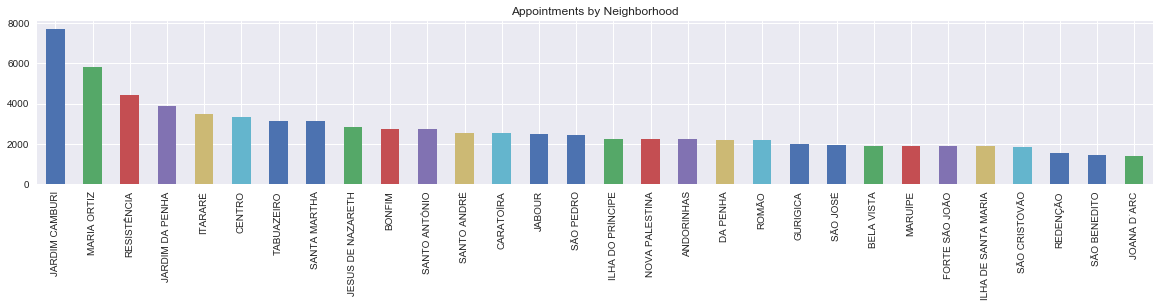

In [41]:
#visualize the top 30 neighborhoods by appointments
df_top_30_areas['neighborhood'].value_counts().plot(kind='bar', figsize=(20,3))
plt.title('Appointments by Neighborhood')
plt.show();

<a id='qs'></a>
## Questions

### 1. What is the overall no-show percentage?

> **Overall Absenteeism:** 
The overall no-show percentage is 20% for a total of 110480 records.

In [42]:
absent_total = df['absenteeism'].value_counts()
print(absent_total)

absent_percentage = absent_total[1]/ absent_total.sum() * 100
print("Percent who miss their appointments:", absent_percentage)

0    88168
1    22312
Name: absenteeism, dtype: int64
Percent who miss their appointments: 20.1955104996


### 2. Factors: Which factors can help predict if a patient will miss their scheduled appointment? 

> **Most indicative factors:** 
The characteristics that show the highest correlation with missed appointments are sms_received and handicap(4). 

### Exploring absenteeism and attendance (arrived and missed)

In [43]:
columns = ['hypertension','alcoholism','diabetes', 'sms_received', 'handicap', 'scholarship']
for r in columns :
    print(df.groupby(r)['absenteeism'].mean())

hypertension
0    0.209048
1    0.173058
Name: absenteeism, dtype: float64
alcoholism
0    0.201970
1    0.201488
Name: absenteeism, dtype: float64
diabetes
0    0.203641
1    0.180169
Name: absenteeism, dtype: float64
sms_received
0    0.167036
1    0.275777
Name: absenteeism, dtype: float64
handicap
0    0.202387
1    0.178466
2    0.203297
3    0.230769
4    0.333333
Name: absenteeism, dtype: float64
scholarship
0    0.198095
1    0.237363
Name: absenteeism, dtype: float64


In [44]:
df.groupby('sms_received')['absenteeism'].mean()

sms_received
0    0.167036
1    0.275777
Name: absenteeism, dtype: float64

In [45]:
df['absenteeism'].value_counts()

0    88168
1    22312
Name: absenteeism, dtype: int64

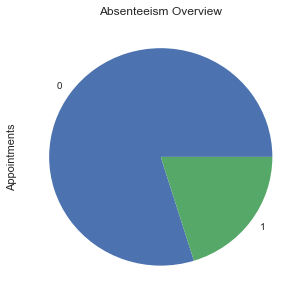

In [46]:
df['absenteeism'].value_counts().plot(kind='pie',figsize=(5,5));
plt.title('Absenteeism Overview') 
plt.ylabel("Appointments");

### Exploring absenteeism and hypertension, absenteeism and diabetes

In [47]:
#select all rows where the patient was absent and has hypertension
df[(df['hypertension'] == 1) & (df['absenteeism'] == 1)]

,patient_id,appointment_id,gender,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absenteeism,week_day,age_bins
44,2.741649e+11,5635414,1,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,1,5,"(70, 80]"
212,4.266984e+14,5642059,0,2016-04-29,62,SANTOS DUMONT,0,1,1,0,0,0,1,5,"(60, 70]"
270,8.617228e+12,5620528,1,2016-04-29,45,CARATOÍRA,1,1,0,0,0,1,1,5,"(40, 50]"
272,5.119616e+12,5594085,1,2016-04-29,51,NOVA PALESTINA,0,1,0,0,1,1,1,5,"(50, 60]"
352,5.917359e+12,5494413,1,2016-04-29,62,SÃO CRISTÓVÃO,0,1,0,0,0,1,1,5,"(60, 70]"
441,3.935966e+13,5639484,0,2016-04-29,36,SÃO BENEDITO,0,1,0,0,0,0,1,5,"(30, 40]"
463,5.228864e+08,5633872,1,2016-04-29,66,SÃO CRISTÓVÃO,0,1,1,0,0,0,1,5,"(60, 70]"
537,3.546481e+13,5590085,0,2016-04-29,58,ITARARÉ,0,1,0,0,0,1,1,5,"(50, 60]"
619,4.272659e+13,5634178,1,2016-04-29,67,PRAIA DO CANTO,0,1,1,0,0,0,1,5,"(60, 70]"
684,8.238132e+13,5629179,1,2016-04-29,73,JOANA D´ARC,0,1,0,0,0,0,1,5,"(70, 80]"


In [48]:
# Create variables for diabetes, hypertension positive
hypertension_yes = df['hypertension'] == 1
diabetes_yes = df['diabetes'] == 1

In [49]:
# Select all cases where hypertension and missed appointment are true
df[missed & hypertension_yes]

,patient_id,appointment_id,gender,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absenteeism,week_day,age_bins
44,2.741649e+11,5635414,1,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,1,5,"(70, 80]"
212,4.266984e+14,5642059,0,2016-04-29,62,SANTOS DUMONT,0,1,1,0,0,0,1,5,"(60, 70]"
270,8.617228e+12,5620528,1,2016-04-29,45,CARATOÍRA,1,1,0,0,0,1,1,5,"(40, 50]"
272,5.119616e+12,5594085,1,2016-04-29,51,NOVA PALESTINA,0,1,0,0,1,1,1,5,"(50, 60]"
352,5.917359e+12,5494413,1,2016-04-29,62,SÃO CRISTÓVÃO,0,1,0,0,0,1,1,5,"(60, 70]"
441,3.935966e+13,5639484,0,2016-04-29,36,SÃO BENEDITO,0,1,0,0,0,0,1,5,"(30, 40]"
463,5.228864e+08,5633872,1,2016-04-29,66,SÃO CRISTÓVÃO,0,1,1,0,0,0,1,5,"(60, 70]"
537,3.546481e+13,5590085,0,2016-04-29,58,ITARARÉ,0,1,0,0,0,1,1,5,"(50, 60]"
619,4.272659e+13,5634178,1,2016-04-29,67,PRAIA DO CANTO,0,1,1,0,0,0,1,5,"(60, 70]"
684,8.238132e+13,5629179,1,2016-04-29,73,JOANA D´ARC,0,1,0,0,0,0,1,5,"(70, 80]"


In [50]:
#Select all cases where diabetes and missed appointment are true
df[missed & diabetes_yes]

,patient_id,appointment_id,gender,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absenteeism,week_day,age_bins
44,2.741649e+11,5635414,1,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,1,5,"(70, 80]"
126,9.447582e+14,5633576,1,2016-04-29,67,PRAIA DO SUÁ,0,0,1,0,0,0,1,5,"(60, 70]"
212,4.266984e+14,5642059,0,2016-04-29,62,SANTOS DUMONT,0,1,1,0,0,0,1,5,"(60, 70]"
463,5.228864e+08,5633872,1,2016-04-29,66,SÃO CRISTÓVÃO,0,1,1,0,0,0,1,5,"(60, 70]"
619,4.272659e+13,5634178,1,2016-04-29,67,PRAIA DO CANTO,0,1,1,0,0,0,1,5,"(60, 70]"
729,3.969538e+12,5636130,1,2016-04-29,69,CENTRO,0,1,1,0,0,0,1,5,"(60, 70]"
968,7.244332e+14,5399572,1,2016-04-29,78,CRUZAMENTO,0,1,1,0,0,0,1,5,"(70, 80]"
972,8.941338e+10,5361416,0,2016-04-29,75,BONFIM,0,1,1,0,0,1,1,5,"(70, 80]"
973,8.219692e+14,5331088,1,2016-04-29,66,MARIA ORTIZ,0,1,1,0,0,1,1,5,"(60, 70]"
979,2.539578e+12,5627308,1,2016-04-29,81,SANTO ANDRÉ,0,1,1,0,0,0,1,5,"(80, 90]"


In [51]:
#select all rows where the patient was absent and has diabetes
df[(df['diabetes'] == 1) & (df['absenteeism'] == 1)]

,patient_id,appointment_id,gender,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absenteeism,week_day,age_bins
44,2.741649e+11,5635414,1,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,1,5,"(70, 80]"
126,9.447582e+14,5633576,1,2016-04-29,67,PRAIA DO SUÁ,0,0,1,0,0,0,1,5,"(60, 70]"
212,4.266984e+14,5642059,0,2016-04-29,62,SANTOS DUMONT,0,1,1,0,0,0,1,5,"(60, 70]"
463,5.228864e+08,5633872,1,2016-04-29,66,SÃO CRISTÓVÃO,0,1,1,0,0,0,1,5,"(60, 70]"
619,4.272659e+13,5634178,1,2016-04-29,67,PRAIA DO CANTO,0,1,1,0,0,0,1,5,"(60, 70]"
729,3.969538e+12,5636130,1,2016-04-29,69,CENTRO,0,1,1,0,0,0,1,5,"(60, 70]"
968,7.244332e+14,5399572,1,2016-04-29,78,CRUZAMENTO,0,1,1,0,0,0,1,5,"(70, 80]"
972,8.941338e+10,5361416,0,2016-04-29,75,BONFIM,0,1,1,0,0,1,1,5,"(70, 80]"
973,8.219692e+14,5331088,1,2016-04-29,66,MARIA ORTIZ,0,1,1,0,0,1,1,5,"(60, 70]"
979,2.539578e+12,5627308,1,2016-04-29,81,SANTO ANDRÉ,0,1,1,0,0,0,1,5,"(80, 90]"


In [52]:
#Groupby hyptension and absenteeism and see a descriptive summary
df.groupby(['hypertension', 'absenteeism']).describe()

age                                         \
                            count       mean        std  min   25%   50%   
hypertension absenteeism                                                   
0            0            70163.0  31.864772  21.534238  0.0  14.0  31.0   
             1            18544.0  29.137349  19.476148  0.0  14.0  27.0   
1            0            18005.0  60.751291  13.762684  7.0  52.0  61.0   
             1             3768.0  59.681529  14.369464  4.0  51.0  59.0   

                                     alcoholism           ...  sms_received  \
                           75%   max      count      mean ...           75%   
hypertension absenteeism                                  ...                 
0            0            49.0  95.0    70163.0  0.022804 ...           1.0   
             1            43.0  95.0    18544.0  0.023350 ...           1.0   
1            0            70.0  95.0    18005.0  0.060150 ...           1.0   
             1            69.0  95.0     3768.0  0.064756 ...           1.0   

                              week_day                                     \
                          max    count      mean       std  min  25%  50%   
hypertension absenteeism                                                    
0            0            1.0  70163.0  2.854510  1.367656  1.0  2.0  3.0   
             1            1.0  18544.0  2.861411  1.387960  1.0  2.0  3.0   
1            0            1.0  18005.0  2.868148  1.365600  1.0  2.0  3.0   
             1            1.0   3768.0  2.861730  1.393313  1.0  2.0  3.0   

                                    
                          75%  max  
hypertension absenteeism            
0            0            4.0  6.0  
             1            4.0  6.0  
1            0            4.0  6.0  
             1            4.0  6.0  

[4 rows x 80 columns]

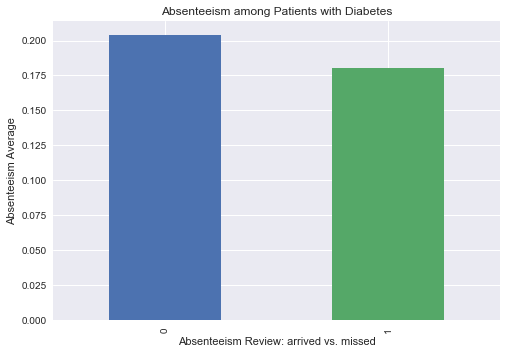

In [53]:
df.groupby('diabetes').absenteeism.mean().plot(kind='bar')
plt.title('Absenteeism among Patients with Diabetes')
plt.xlabel("Absenteeism Review: arrived vs. missed") 
plt.ylabel("Absenteeism Average" )
plt.show();

### 3. What is the relationship between absenteeism and age?

> **Age & Absenteeism:** 
Appointment_ids held by Patients aged 10-20 are on average most likely to end up missed. By count, appointment_ids held by patients aged 50-60 are most likely to end up missed.  

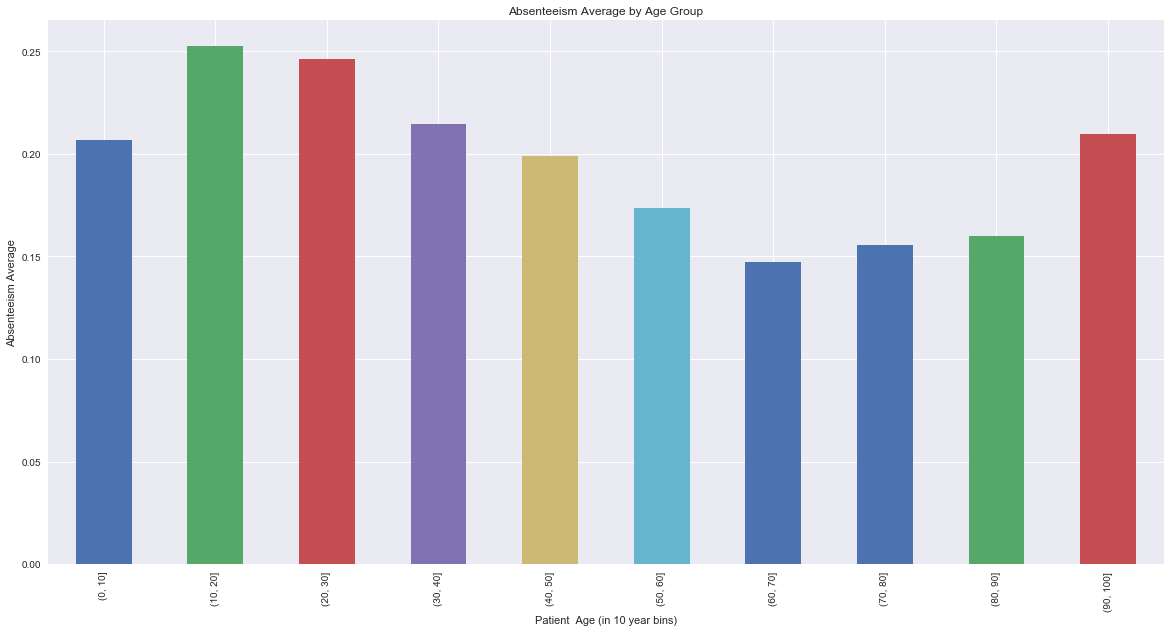

In [54]:
df.groupby('age_bins').absenteeism.mean().plot(kind='bar',figsize=(20, 10))
plt.title('Absenteeism Average by Age Group')
plt.xlabel("Patient  Age (in 10 year bins)") 
plt.ylabel("Absenteeism Average" )
plt.show()

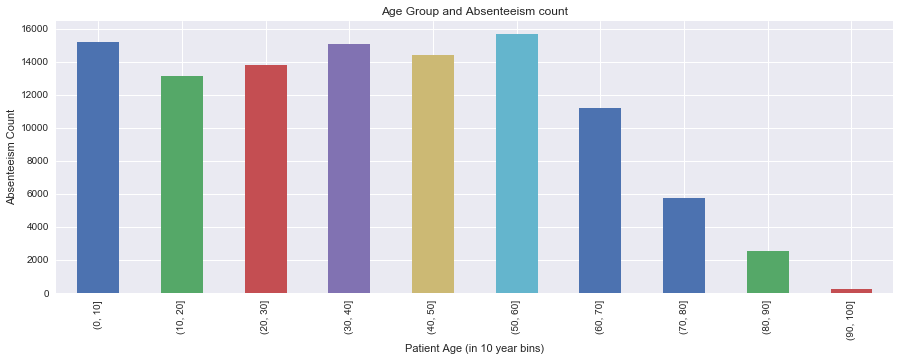

In [55]:
df_age = df[['absenteeism', 'age_bins']].groupby('age_bins').count()
plot_title = 'Age Group and Absenteeism count'
ax = df_age['absenteeism'].plot(kind='bar', figsize=(15, 5), title=plot_title)
ax.set_ylabel('Absenteeism Count')
ax.set_xlabel('Patient Age (in 10 year bins)');

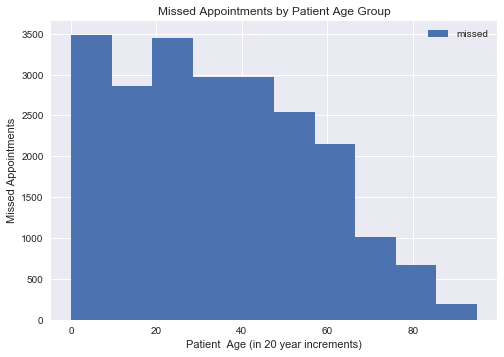

In [56]:
df.age[missed].hist(label='missed');
plt.title('Missed Appointments by Patient Age Group')
plt.xlabel("Patient  Age (in 20 year increments)") 
plt.ylabel("Missed Appointments" )
plt.legend();

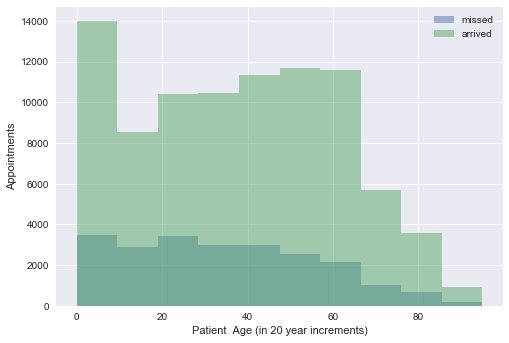

In [57]:
df.age[missed].hist(alpha=0.5, label='missed')
df.age[arrived].hist(alpha=0.5, label='arrived')
plt.xlabel("Patient  Age (in 20 year increments)") 
plt.ylabel("Appointments" )
plt.legend();

### 4. What is the relationship between absenteeism and appointment day?

> **Day of the Week & Absenteeism:** 
Appointments are more likely to be missed on Tuesdays.  

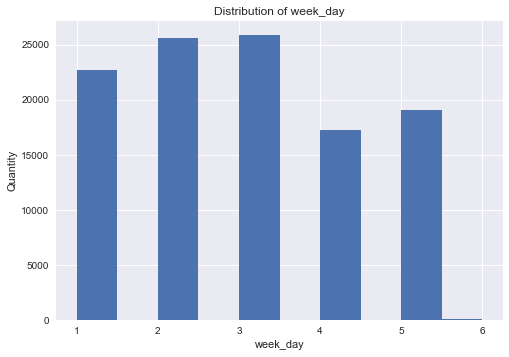

In [58]:
# Distribution of 'week_day'
plt.figure();
age_hist = df['week_day'].plot.hist(bins=10)
age_hist.set_xlabel("week_day")
age_hist.set_ylabel("Quantity")
age_hist.set_title('Distribution of week_day');

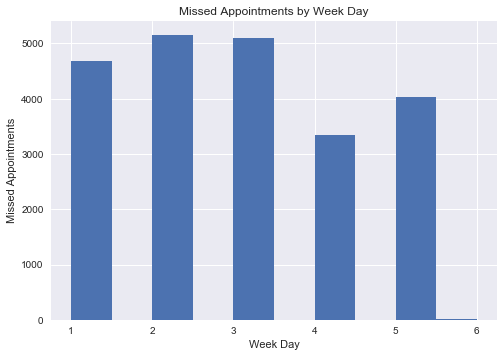

In [59]:
df.week_day[missed].hist(label='missed')
plt.title('Missed Appointments by Week Day')
plt.xlabel("Week Day") 
plt.ylabel("Missed Appointments" )
plt.show();

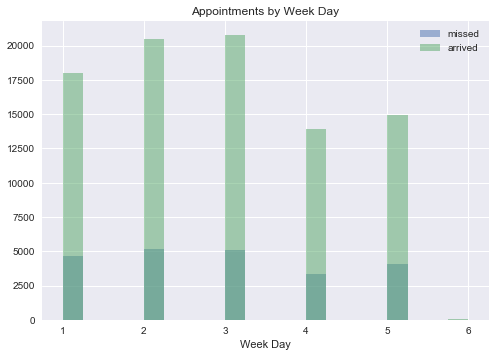

In [60]:
df.week_day[missed].hist(alpha=0.5, bins = 20, label='missed')
df.week_day[arrived].hist(alpha=0.5, bins = 20, label='arrived')
plt.title('Appointments by Week Day')
plt.xlabel("Week Day")
plt.legend();

<a id='conclusions'></a>
## Conclusions

- A patient's age appears to have an impact on likelihood to miss appointments.
- SMS texts received appear to have a negative impact on keeping appointments.
- Certain days have higher missed appointment rates

### Limitations of dataset

More information is needed on the conditions for which SMS texts were sent to patients. 

In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255